In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
H_in_kJmol = 2625.499639

In [584]:
ABF_out = pd.read_csv('ABF_bias_out.txt',sep='\t') # sigma=3.0 Bohr, tau=10000, N_full=100
ABF_out.columns = ['Bin','Xi','Hist','Mean Grad', 'bias', 'dF', 'dF geom']

In [625]:
metaD_out = pd.read_csv('metaD_bias_out.txt',sep='\t') # height=0.1, var=2.0, update_int=20, dT=2000
metaD_out.columns = ['Bin','Xi','Histvim','Mean Grad', 'metaD-bias', 'metaD-force', 'dF', 'dF geom']

In [626]:
eABF_out = pd.read_csv('eABF_bias_out.txt',sep='\t') # sigma=3.0 Bohr, tau=100000, N_full=100
eABF_out.columns = ['Bin','Xi','Hist','Mean Grad', 'Mean Force', 'dF/n', 'dF/n geom', 'dF/CZAR','dF/CZAR geom']

In [627]:
meta_eABF_out = pd.read_csv('meta_eABF_bias_out.txt',sep='\t') # sigma=3.0 Bohr, tau=100000, N_full=100
meta_eABF_out.columns = ['Bin','Xi','Hist','Mean Grad','eABF bias', 'metaD bias', 'dF', 'dF geom','dF/CZAR','dF/CZAR geom']

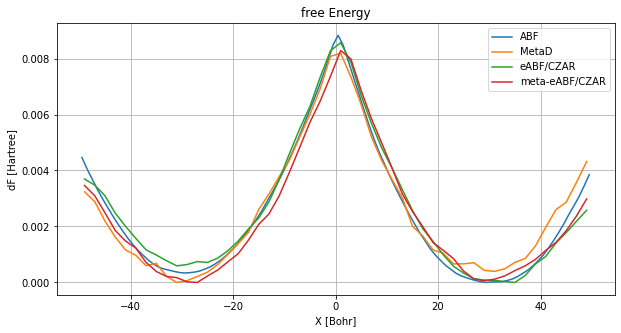

In [628]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(ABF_out['Xi'],ABF_out['dF'],label='ABF')
ax1.plot(metaD_out['Xi'],metaD_out['dF'],label='MetaD')
ax1.plot(eABF_out['Xi'],eABF_out['dF/CZAR'],label='eABF/CZAR')
ax1.plot(meta_eABF_out['Xi'],meta_eABF_out['dF/CZAR'],label='meta-eABF/CZAR')

ax1.set_title('free Energy')
ax1.set_xlabel('X [Bohr]')
ax1.set_ylabel('dF [Hartree]')
ax1.grid()
plt.legend()

Test convergence:

In [615]:
ABF_conv = pd.read_csv('ABF_bias_conv.dat',sep='\t') # N_full=100
ABF_conv['sum'] = [0 for i in range(len(ABF_conv))]
for i in range(len(ABF_conv)):
    ABF_conv.iloc[i,-1] = np.sum(ABF_conv.iloc[i,1:-2])/len(ABF_conv.iloc[i,1:-2])

In [616]:
eABF_conv = pd.read_csv('eABF_bias_conv.dat',sep='\t') # sigma=3.0 Bohr, tau=10000, N_full=100
eABF_conv['sum'] = [0 for i in range(len(eABF_conv))]
for i in range(len(eABF_conv)):
    eABF_conv.iloc[i,-1] = np.sum(eABF_conv.iloc[i,1:-2])/len(eABF_conv.iloc[i,1:-2])

In [1159]:
metaD_conv = pd.read_csv('wt_metaD_bias_conv.dat',sep='\t') # var=3.0 Bohr, height=0.1 kJ/mol, update int=20, dF=2000
metaD_conv['sum'] = [0 for i in range(len(metaD_conv))]
for i in range(len(metaD_conv)):
    metaD_conv.iloc[i,-1] = np.sum(metaD_conv.iloc[i,1:-2])/len(metaD_conv.iloc[i,1:-2])

In [1275]:
meta_eabf_conv = pd.read_csv('bias_conv.dat',sep='\t') # sigma=3.0 Bohr, tau=10000, N_full=100
meta_eabf_conv['sum'] = [0 for i in range(len(meta_eabf_conv))]
for i in range(len(meta_eabf_conv)):
    meta_eabf_conv.iloc[i,-1] = np.sum(meta_eabf_conv.iloc[i,1:-2])/len(meta_eabf_conv.iloc[i,1:-2])

Text(0.5, 1.0, 'Convergence of bias force')

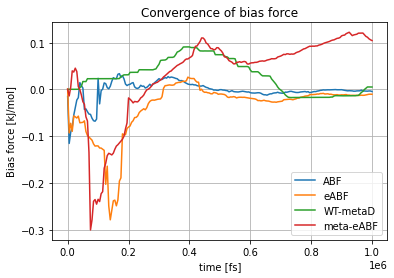

In [1276]:
plt.plot(ABF_conv.iloc[:,0], ABF_conv['sum']*H_in_kJmol, label='ABF')
plt.plot(eABF_conv.iloc[:,0], eABF_conv['sum']*H_in_kJmol, label='eABF')
plt.plot(metaD_conv.iloc[:,0], metaD_conv['sum']*H_in_kJmol, label='WT-metaD')
plt.plot(meta_eabf_conv.iloc[:,0],meta_eabf_conv['sum']*H_in_kJmol, label='meta-eABF')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('time [fs]')
plt.ylabel('Bias force [kJ/mol]')
plt.title('Convergence of bias force')